## Google Data Analytics Certification - Case Study

### Introduction
The following report was made as a case study for the Google data analytics certification. The case study consists in applying the data analysis process to the data sets of a real life company called Divvy, which is a business branch of the company Lyft. For the purpose of this case study, the company will be named Cyclistic.

Due to the size of the data sets, Python was used to solve the case study. The code related to the analysis is included in this report.

#### Additional Notes
The case study will be solved by following the 6 steps of the data analysis process: 

1.  Ask
2.  Prepare
3.  Process
4.  Analyze
5.  Share
6.  Act

### Step 1 - Ask

#### Company's Background
Cyclistic, a company launched in 2016, has been offering bike-sharing services in the city of Chicago, Illinois, USA. The customers from this company can unlock geotracked bicycles from a local station and use it to travel around the city, after the trip these bicycles can be returned to any station inside the city.

Cyclistic has implemented three types of purchasing plans for their services, these vary in price and duration: **single-ride** passes for one time rides, **full-day** passes and an **annual** membership.

At the moment, the company has grown its inventory in active use of geotracked bicycles to a total number of 5,824 and 692 stations located across Chicago

#### Problem Description
Cyclistic's stakeholders, following the insight provided by the analytics team which states that the most profitable plan is the annual membership, believe that maximizing the amount of existing members with an annual membership is a top priority for the success of the company.

The director of marketing has decided to design a new marketing strategy, aimed for the conversion of casual riders (one time and full-day members) into annual members.

Three questions are important to be answered:

1.  How do annual members and casual riders use Cyclistic bikes differently?
2.  Why would casual riders buy Cyclistic annual memberships?
3.  How can Cyclistic use digital media to influence casual riders to become members?

The scope of this report will only focus on the first question:

> How do annual members and casual riders use Cyclistic bikes differently?

### Step 2 - Prepare

#### Dataset description
The data is stored in comma-separated values (CSV) files, twelve CSV files will be used for the analysis which corresponds to the months of March, 2021 until February, 2022. This data was generated and gathered by the company's bicycle stations spread around the city of Chicago.

Each dataset contains structured data with more than 200,000 observations (which aggregates to over 5 million observations), and twelve variables:

+ **ride_id** - ride identifier 
+ **rideable_type** - type of bicycle used
+ **started_at** - date-time for the start of the ride
+ **ended_at** - date-time for the end of the ride
+ **start_station_name** - station name where the trip started
+ **start_station_id** - station id where the trip started
+ **end_station_name** - station name where the trip ended
+ **end_station_id** - station id where the trip ended
+ **start_lat** - starting latitude location information
+ **start_lng** - starting longitude location information
+ **end_lat** - ending latitude location information
+ **end_lng** - ending longitude location information
+ **member_casual** - user's membership category

#### Information about the data
The data to be used is publicly available within an Amazon Simple Storage Device (S3) at the following [link](https://divvy-tripdata.s3.amazonaws.com/index.html). The Personal Identifiable Information (PII) has been removed in order to protect the privacy of the users. The data has been made available by Motivate International Inc. under the following [license](https://ride.divvybikes.com/data-license-agreement).

#### Limitations of the dataset
The data from the past 12 months (since writing this report) will be used to answer the business task.

#### Is it good or bad data? (ROCCC)
The following guideline will help to understand whether the data is accurate and reliable.

**R**eliable - The data is accurate, unbiased and complete

**O**riginal - The date comes from a First Party Data

**C**omprehensive - The dataset contains the necessary information

**C**urrent - The dataset contains the past 12 months of data

**C**ited - The data was made by the company

In general, the datasets provided by the company have data integrity and it includes the relevant information required for the analysis of the stakeholder's question.

### Step 3 - Process

This step is in charge of importing, binding and cleaning the dataset. 

#### 3.1 - Import and Bind
First, the required packages are loaded.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from pathlib import Path
import seaborn as sns
from scipy.stats import iqr

%matplotlib inline
mpl.rcParams['figure.dpi']= 100

The data is then imported and saved as a nested list.

In [2]:
p = Path('./data').glob('*.csv')
paths = [x for x in p]

mapper = map(lambda x: pd.read_csv(x, parse_dates=['started_at', 'ended_at']), paths)
trip_data = list(mapper)

The next step is to join the dataframes together. The list elements have to be inspected for compatibility.

In [3]:
for x in trip_data:
    compare_columns = x.columns.isin(trip_data[0].columns)
    compare_columns_types = x.dtypes.isin(trip_data[0].dtypes)

if False in compare_columns:
    print('Column names are not the same')
else:
    print('Column names are the same')
    
if False in compare_columns_types:
    print('Column types are not the same')
else:
    print('Column types are the same')

Column names are the same
Column types are the same


The datasets are compatible, these are row binded together.

In [4]:
all_trips = pd.concat(trip_data, ignore_index = True)
all_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5667986 entries, 0 to 5667985
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 562.2+ MB


#### 3.2 - Data Cleaning
It is time for the data cleaning process:

The variables not needed for the analysis are removed (latitude and longitude), then the data set is inspected.

In [5]:
all_trips = all_trips.drop(columns = ['start_lat', 'start_lng', 'end_lat', 'end_lng'])

Duplicate values within the variables are searched by listing the unique values.

In [6]:
all_trips.nunique()

ride_id               5667986
rideable_type               3
started_at            4747127
ended_at              4740417
start_station_name        853
start_station_id          844
end_station_name          854
end_station_id            846
member_casual               2
dtype: int64

In [7]:
all_trips.apply(lambda x: x.unique())

ride_id               [CFA86D4455AA1030, 30D9DC61227D1AF3, 846D87A15...
rideable_type                [classic_bike, electric_bike, docked_bike]
started_at            [2021-03-16T08:32:30.000000000, 2021-03-28T01:...
ended_at              [2021-03-16T08:36:34.000000000, 2021-03-28T01:...
start_station_name    [Humboldt Blvd & Armitage Ave, Shields Ave & 2...
start_station_id      [15651, 15443, TA1308000021, 525, 13050, TA130...
end_station_name      [Stave St & Armitage Ave, Central Park Ave & B...
end_station_id        [13266, 18017, TA1308000043, 13323, E008, LF-0...
member_casual                                          [casual, member]
dtype: object

The data looks clean so far, next the null values are searched.

In [8]:
all_trips.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    712978
start_station_id      712975
end_station_name      761817
end_station_id        761817
member_casual              0
dtype: int64

The null values represent the maintenance performed on the bicycles on a given day, these will be acted upon at a later stage of the cleaning process. Next, the following variables must be added to facilitate the analysis process:

+ Date
+ Year
+ Month
+ Day of the month
+ Day of the week
+ Starting hour
+ Ending hour
+ Weekday
+ Weekend

In [9]:
all_trips['date'] = all_trips['started_at'].dt.date
all_trips['year'] = all_trips['started_at'].dt.year
all_trips['month'] = all_trips['started_at'].dt.month_name()
all_trips['day'] = all_trips['started_at'].dt.day
all_trips['day_of_the_week'] = all_trips['started_at'].dt.day_name()
all_trips['start_hour'] = all_trips['started_at'].dt.hour
all_trips['end_hour'] = all_trips['ended_at'].dt.hour
all_trips['weekday'] = all_trips['started_at'].dt.weekday < 5
all_trips['weekend'] = all_trips['started_at'].dt.weekday >= 5

The ride length in seconds of each trip is added as a numeric value to the dataset.

In [10]:
all_trips['ride_length'] = (all_trips['ended_at'] - all_trips['started_at']).astype("timedelta64[s]")
all_trips

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,date,year,month,day,day_of_the_week,start_hour,end_hour,weekday,weekend,ride_length
0,CFA86D4455AA1030,classic_bike,2021-03-16 08:32:30,2021-03-16 08:36:34,Humboldt Blvd & Armitage Ave,15651,Stave St & Armitage Ave,13266,casual,2021-03-16,2021,March,16,Tuesday,8,8,True,False,244.0
1,30D9DC61227D1AF3,classic_bike,2021-03-28 01:26:28,2021-03-28 01:36:55,Humboldt Blvd & Armitage Ave,15651,Central Park Ave & Bloomingdale Ave,18017,casual,2021-03-28,2021,March,28,Sunday,1,1,False,True,627.0
2,846D87A15682A284,classic_bike,2021-03-11 21:17:29,2021-03-11 21:33:53,Shields Ave & 28th Pl,15443,Halsted St & 35th St,TA1308000043,casual,2021-03-11,2021,March,11,Thursday,21,21,True,False,984.0
3,994D05AA75A168F2,classic_bike,2021-03-11 13:26:42,2021-03-11 13:55:41,Winthrop Ave & Lawrence Ave,TA1308000021,Broadway & Sheridan Rd,13323,casual,2021-03-11,2021,March,11,Thursday,13,13,True,False,1739.0
4,DF7464FBE92D8308,classic_bike,2021-03-21 09:09:37,2021-03-21 09:27:33,Glenwood Ave & Touhy Ave,525,Chicago Ave & Sheridan Rd,E008,casual,2021-03-21,2021,March,21,Sunday,9,9,False,True,1076.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5667981,211BE0DC162D85B7,electric_bike,2022-02-23 17:47:49,2022-02-23 18:02:29,NaN,NaN,Leavitt St & Chicago Ave,18058,member,2022-02-23,2022,February,23,Wednesday,17,18,True,False,880.0
5667982,D4D53E78000C8CA1,electric_bike,2022-02-04 10:43:47,2022-02-04 10:50:52,NaN,NaN,Leavitt St & Chicago Ave,18058,member,2022-02-04,2022,February,4,Friday,10,10,True,False,425.0
5667983,9E85F07D2F94492B,electric_bike,2022-02-28 09:16:33,2022-02-28 09:28:11,Wood St & Chicago Ave,637,Canal St & Adams St,13011,member,2022-02-28,2022,February,28,Monday,9,9,True,False,698.0
5667984,B61B559F81F1D823,electric_bike,2022-02-10 16:55:16,2022-02-10 16:57:53,NaN,NaN,Canal St & Adams St,13011,member,2022-02-10,2022,February,10,Thursday,16,16,True,False,157.0


The data observations produced by a false start must be identified and removed, a false positive observation corresponds to a trip with a duration of less than 60 seconds, this happens when an user fails to retrieve the bicycle from a docking station.

In [11]:
print('Total false starts: ' + str(all_trips['ride_length'].lt(60).sum()))

Total false starts: 87250


In order to remove the false starts, a new dataset is created without the bad data. (The original dataset must be preserved)

In [12]:
all_trips_v2 = all_trips[all_trips['ride_length'] >= 60]

In [13]:
print('Total false starts: ' + str(all_trips_v2['ride_length'].lt(60).sum()))

Total false starts: 0


The maintenance days data will then be removed from the new dataset

In [14]:
all_trips_v2 = all_trips_v2.dropna()
all_trips_v2.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
member_casual         0
date                  0
year                  0
month                 0
day                   0
day_of_the_week       0
start_hour            0
end_hour              0
weekday               0
weekend               0
ride_length           0
dtype: int64

The dataset no longer has duplicate or null values, the data has been cleaned.

### Step 4 & 5 - Analyze & Share
In order to discover how the users differ from each other, the exploratory data analysis process will be applied to three main ideas:

+ Trip count analysis
+ Ride length analysis
+ Popular stations analysis

#### 4.1 - Trip count analysis
Casual and Annual memberships will be compared under a trip count analysis, this will help to differentiate how each membership type interacts with the services through the year, months and days. First, the yearly count of bicycle trips is obtained, which is grouped by membership type.


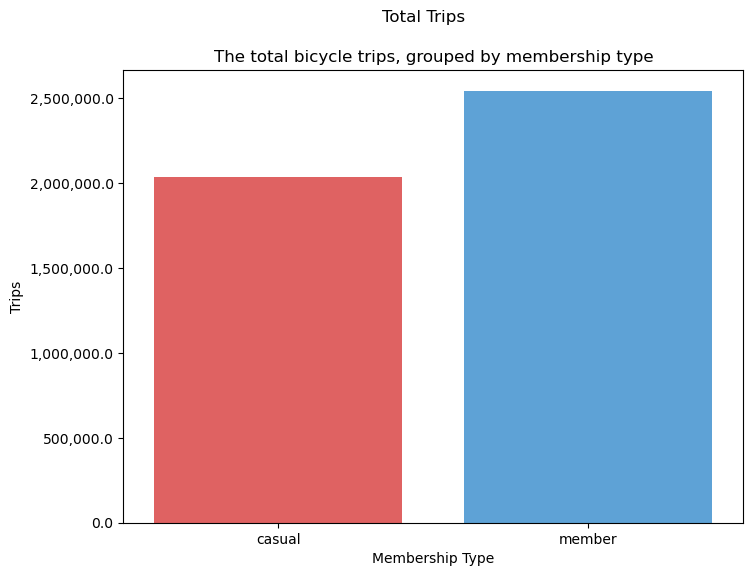

In [15]:
colors = ["#f44d4d", "#4aa5ea"]
sns.set_palette(sns.color_palette(colors))

fig, ax =  plt.subplots(figsize=(8, 6))
sns.countplot(x = all_trips_v2['member_casual'], data = all_trips_v2)
ax.set_xlabel('Membership Type')
ax.set_ylabel('Trips')
ax.set_title('The total bicycle trips, grouped by membership type')
fig.suptitle('Total Trips')
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x, pos: format(x, ',')))

It can be observed that the member category (users with annual membership) have a higher trip count than casual users (one-time and daily membership), this was expected because members have the option of unlimited trips in a year. 

Unfortunately due to privacy constraints, the distinct user count within each membership category cannot be determined, this would have been beneficial for a more detailed analysis.

Next, it is of interest to visualize how each membership category interacts with the service month to month.

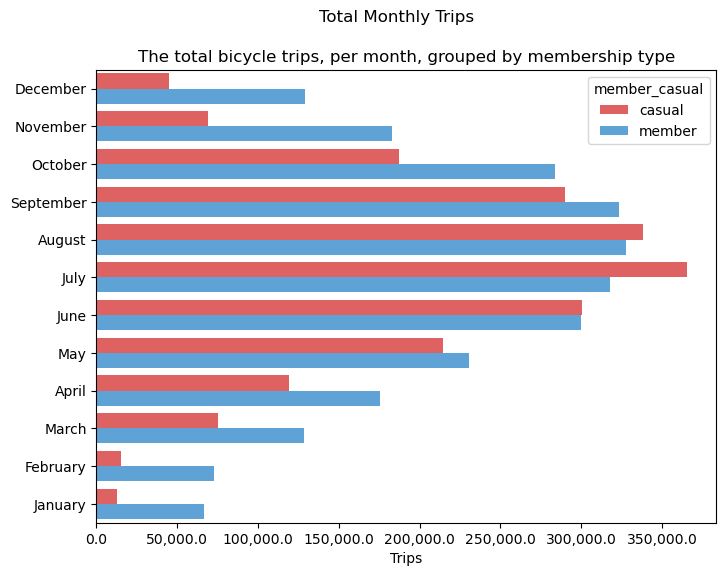

In [16]:
ordered_months = ['December', 'November', 'October', 'September', 'August',
                  'July', 'June', 'May', 'April', 'March', 'February','January']

fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(y='month', hue='member_casual', data = all_trips_v2, order = ordered_months)
ax.set_xlabel('Trips')
ax.set_ylabel('')
ax.set_title('The total bicycle trips, per month, grouped by membership type')
fig.suptitle('Total Monthly Trips')
ax.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x, pos: format(x, ',')))

From this graph it can be determined that casual members are inclined to make more trips on warmer months than annual member, this might indicate that casual users tend to use the bicycles for leisure during the summer and annual members use it as a mean of transportation though the year.

To gather additional information on this, the user trip count by day of the week will be computed and visualized.

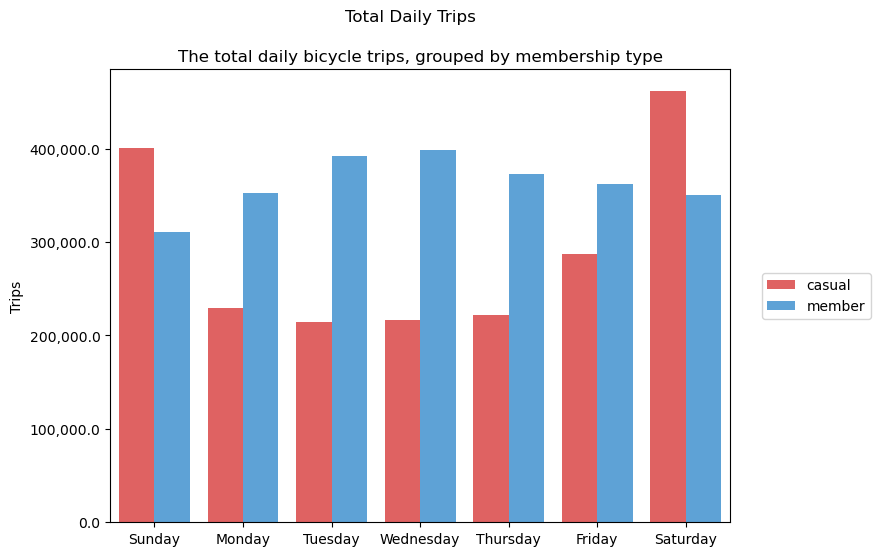

In [17]:
ordered_weekday = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x='day_of_the_week', hue='member_casual', data = all_trips_v2, order = ordered_weekday)
ax.set_xlabel('')
ax.set_ylabel('Trips')
ax.set_title('The total daily bicycle trips, grouped by membership type')
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left")
fig.suptitle('Total Daily Trips')
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x, pos: format(x, ',')))

This graph further supports the theory that casual users use the bicycles for leisure because the demand is higher on the weekends. In contrast, the annual members have a smoother demand though the week and because there is a spike in total trips during the weekday, it is believed that the bicycles are used as a mean of transport.

In order to give a definitive conclusion about the hypothesis, the hourly use will be visualized for each membership category.

Text(0.5, 0.01, 'Hour of the day')

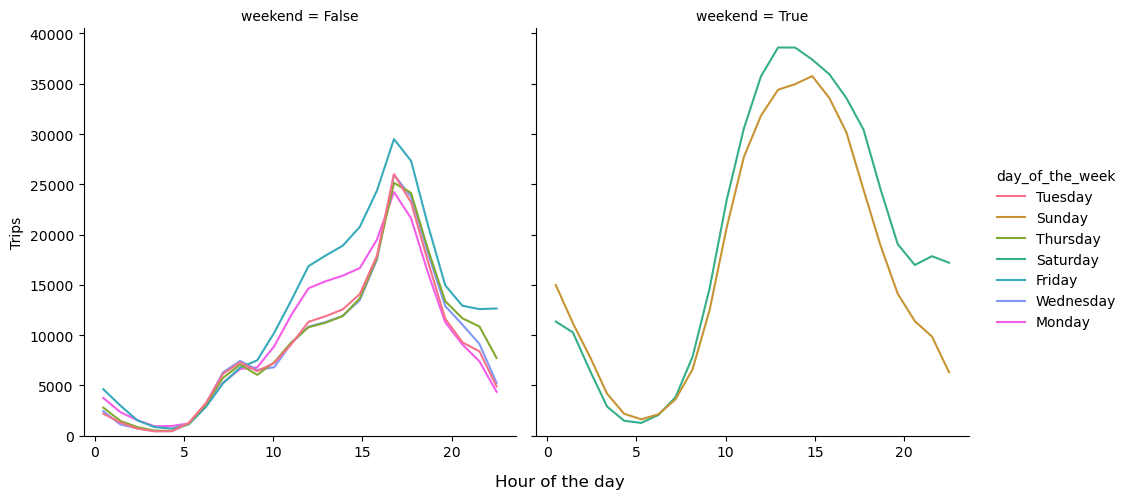

In [18]:
data_filtered = all_trips_v2[all_trips_v2['member_casual'] == 'casual']

g = sns.displot(data=data_filtered, 
                x = 'start_hour', 
                hue='day_of_the_week', 
                col='weekend', 
                bins=24, 
                element='poly', 
                fill = False)
g.set_xlabels('')
g.set_ylabels('Trips')
g.fig.supxlabel('Hour of the day')

Text(0.5, 0.98, 'Casual Members: weekday & weekend average, hourly trips by the hour')

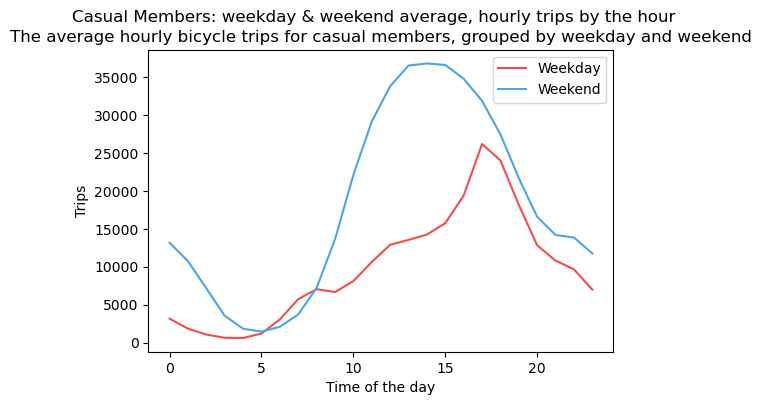

In [19]:
data_filtered = all_trips_v2[(all_trips_v2['member_casual'] == 'casual') & (all_trips_v2['weekday'] == True)]
data_filtered_weekday = data_filtered.groupby(by = ['start_hour', 'day_of_the_week']).count().reset_index()
data_filtered_weekday.groupby('start_hour').mean()

g = sns.lineplot(data = data_filtered_weekday,
            x = 'start_hour',
            y = 'ride_id',
            err_style=None,
            label = 'Weekday')

data_filtered = all_trips_v2[(all_trips_v2['member_casual'] == 'casual') & (all_trips_v2['weekend'] == True)]
data_filtered_weekend = data_filtered.groupby(by = ['start_hour', 'day_of_the_week']).count().reset_index()
data_filtered_weekend.groupby('start_hour').mean()

sns.lineplot(data = data_filtered_weekend,
            x = 'start_hour',
            y = 'ride_id',
            err_style=None,
            label = 'Weekend')
g.set_xlabel('Time of the day')
g.set_ylabel('Trips')
g.set_title('The average hourly bicycle trips for casual members, grouped by weekday and weekend')
g.figure.suptitle('Casual Members: weekday & weekend average, hourly trips by the hour')

This graph represents the preference for the time of the day of casual users to use the bicycle services each day. As expected, it can be observed that there is a higher demand during the weekend. Surprisingly, the users in this category are using the services as a mean of transportation during the weekday, shown by the peak of demand during the rush hour.

The same visualization will be made to users with an annual membership.

Text(0.5, 0.98, 'Annual Member: total daily trips by the hour')

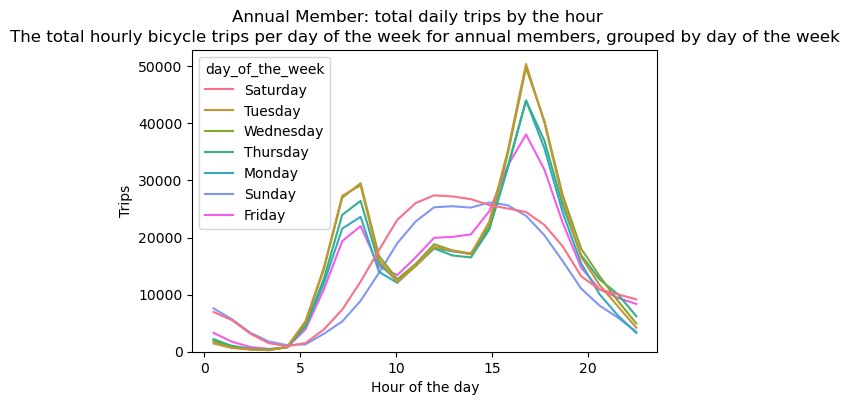

In [20]:
data_filtered = all_trips_v2[all_trips_v2['member_casual'] == 'member']

g = sns.histplot(data=data_filtered, 
                x = 'start_hour', 
                hue='day_of_the_week', 
                bins=24, 
                element='poly', 
                fill = False)
g.set_xlabel('Hour of the day')
g.set_ylabel('Trips')
g.set_title('The total hourly bicycle trips per day of the week for annual members, grouped by day of the week')
g.figure.suptitle('Annual Member: total daily trips by the hour')

Text(0.5, 0.98, 'Annual Members: weekday & weekend average hourly trips by the hour')

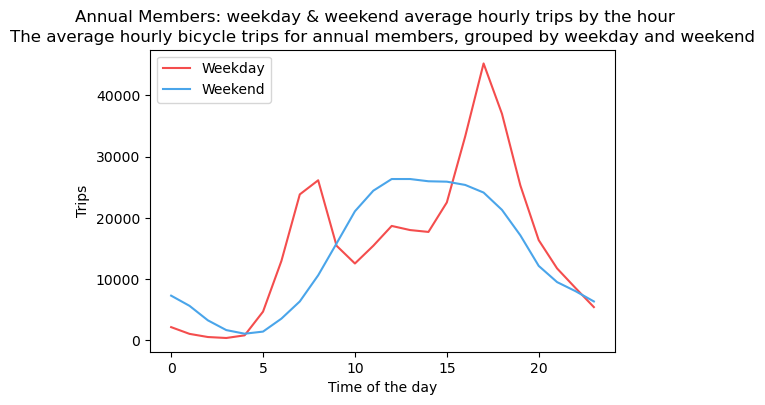

In [21]:
data_filtered = all_trips_v2[(all_trips_v2['member_casual'] == 'member') & (all_trips_v2['weekday'] == True)]
data_filtered_weekday = data_filtered.groupby(by = ['start_hour', 'day_of_the_week']).count().reset_index()
data_filtered_weekday.groupby('start_hour').mean()

g = sns.lineplot(data = data_filtered_weekday,
            x = 'start_hour',
            y = 'ride_id',
            err_style=None,
            label = 'Weekday')

data_filtered = all_trips_v2[(all_trips_v2['member_casual'] == 'member') & (all_trips_v2['weekend'] == True)]
data_filtered_weekend = data_filtered.groupby(by = ['start_hour', 'day_of_the_week']).count().reset_index()
data_filtered_weekend.groupby('start_hour').mean()

sns.lineplot(data = data_filtered_weekend,
            x = 'start_hour',
            y = 'ride_id',
            err_style=None,
            label = 'Weekend')
g.set_xlabel('Time of the day')
g.set_ylabel('Trips')
g.set_title('The average hourly bicycle trips for annual members, grouped by weekday and weekend')
g.figure.suptitle('Annual Members: weekday & weekend average hourly trips by the hour')

It can safely be concluded that annual members have a higher demand for bicycles during rush hours on the weekday, this confirms the hypothesis that annual members use the ride-share services primarily as a mean of transportation.

The identified area of opportunity for the company to convert casual users into annual members lies in a targeted marketing campaign focused in casual members that use the bicycles as a mean of transportation during the weekdays.

#### 4.2 - Ride length analysis

The next step in the analysis process involves the identification of the differences in trip duration between annual and casual members. First, the ride length distribution will be visualized in order to inspect the dataset outliers.

Text(0.5, 0.98, 'Ride Length"')

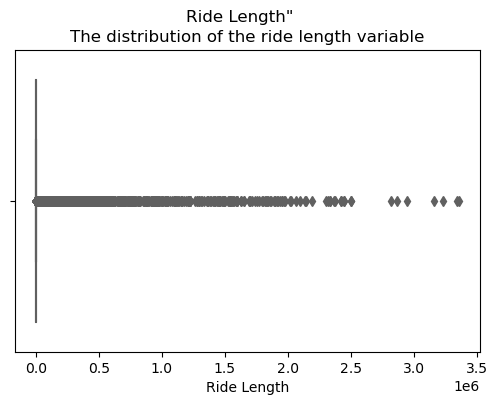

In [22]:
g = sns.boxplot(data = all_trips_v2, x='ride_length')
g.set_xlabel('Ride Length')
g.set_title('The distribution of the ride length variable')
g.figure.suptitle('Ride Length"')

It can be observed that the data contains extreme outliers that will skew the analysis results, to fix this the outliers will be filtered out.

Text(0.5, 0.98, 'Ride Length"')

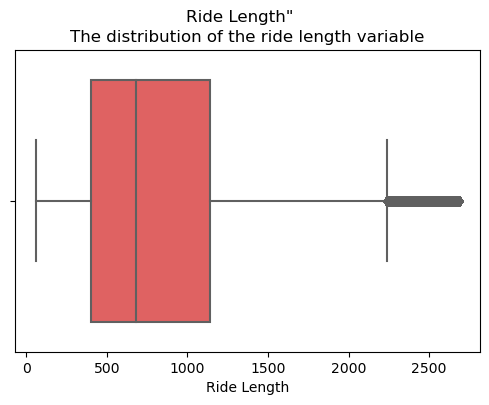

In [36]:
ride_length_array = np.array(all_trips_v2['ride_length'])
Q3 = np.quantile(all_trips_v2['ride_length'], 0.75)
trips_no_outliers = all_trips_v2[all_trips_v2['ride_length'] <= Q3 + 1.5 * iqr(ride_length_array)]

g = sns.boxplot(data = trips_no_outliers, x='ride_length')
g.set_xlabel('Ride Length')
g.set_title('The distribution of the ride length variable')
g.figure.suptitle('Ride Length"')

As seen above, a cleaner distribution is obtained without the extreme outliers. The ride length analysis process will start by analyzing the average trip duration grouped by membership type.

Text(0.5, 0, 'Ride Length')

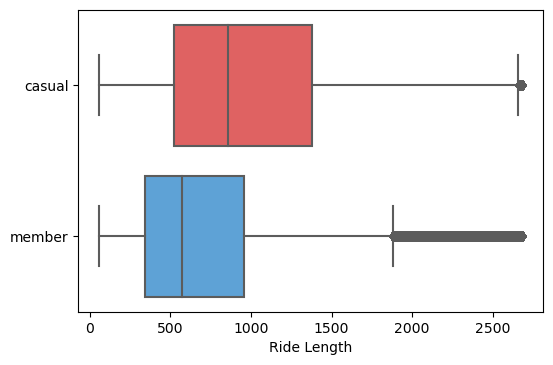

In [41]:
g = sns.boxplot(data=trips_no_outliers, x='ride_length', y='member_casual')
g.set_ylabel('')
g.set_xlabel('Ride Length')

The boxplot indicates that annual members have shorter trips in time length than casual members.

Next, the average trip duration per month is visualized, grouped by membership type.

Text(0.5, 0.98, 'Average trip duration per month')

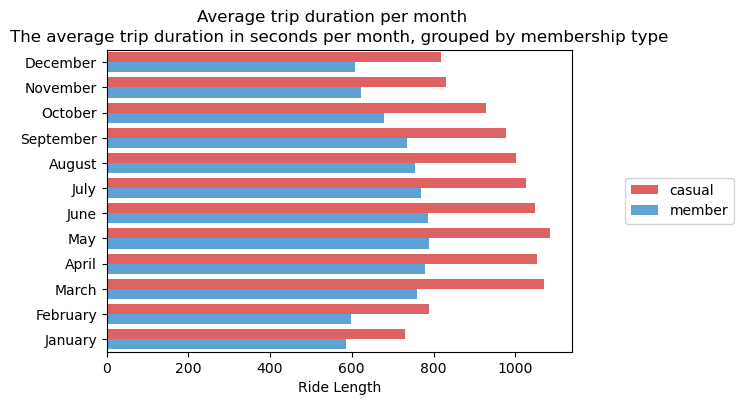

In [61]:
x = trips_no_outliers.groupby(by=['member_casual', 'month']).mean().reset_index()

g = sns.barplot(data = x,
               x='ride_length',
               y='month',
               hue='member_casual',
               order=ordered_months)
g.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
g.set_xlabel('Ride Length')
g.set_ylabel('')
g.set_title('The average trip duration in seconds per month, grouped by membership type')
g.figure.suptitle('Average trip duration per month')

On average, the monthly trip duration for annual members is lower than casual members. Finally the average trip duration per day of the week is computed and visualized.

Text(0.5, 0.98, 'Average trip duration per day of the week')

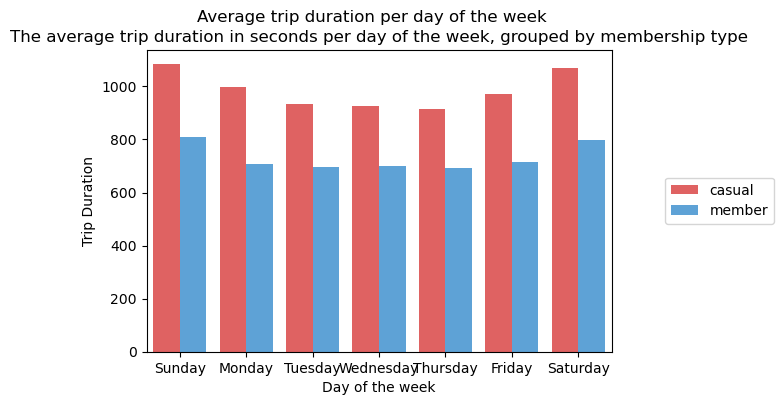

In [63]:
x = trips_no_outliers.groupby(by=['member_casual', 'day_of_the_week']).mean().reset_index()

g = sns.barplot(data = x,
               y='ride_length',
               x='day_of_the_week',
               hue='member_casual',
               order = ordered_weekday)
g.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
g.set_ylabel('Trip Duration')
g.set_xlabel('Day of the week')
g.set_title('The average trip duration in seconds per day of the week, grouped by membership type')
g.figure.suptitle('Average trip duration per day of the week')

It can be concluded from the previous graphs that annual members on average will have a tendency to have shorter trips than casual members.

#### 4.3 - Popular stations analysis
To conclude the analysis process, the top ten popular starting stations for annual and casual users will be computed and analyzed, this will provide the marketing team a reference for the targeted marketing campaign.

Text(0.5, 0.98, 'Casual Members: Popular stations')

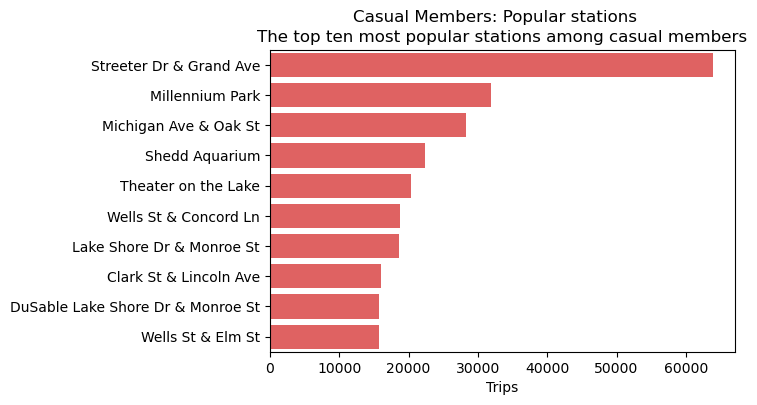

In [83]:
filtered_data = all_trips_v2[all_trips_v2['member_casual'] == 'casual']
filtered_data = filtered_data.groupby(by=['member_casual','start_station_name'])
filtered_data = filtered_data.count().reset_index().sort_values('ride_id', ascending=False)
filtered_data = filtered_data[:10]

g = sns.barplot(data=filtered_data, x='ride_id', y='start_station_name', color='#f44d4d')
g.set_xlabel('Trips')
g.set_ylabel('')
g.set_title('The top ten most popular stations among casual members')
g.figure.suptitle('Casual Members: Popular stations')

Text(0.5, 0.98, 'Annual Members: Popular stations')

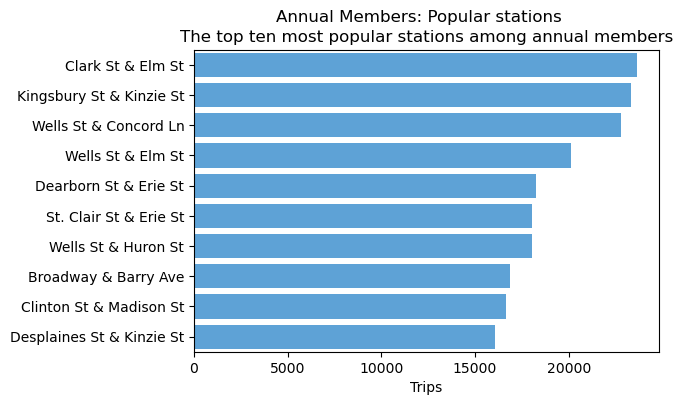

In [84]:
filtered_data = all_trips_v2[all_trips_v2['member_casual'] == 'member']
filtered_data = filtered_data.groupby(by=['member_casual','start_station_name'])
filtered_data = filtered_data.count().reset_index().sort_values('ride_id', ascending=False)
filtered_data = filtered_data[:10]

g = sns.barplot(data=filtered_data, x='ride_id', y='start_station_name', color='#4aa5ea')
g.set_xlabel('Trips')
g.set_ylabel('')
g.set_title('The top ten most popular stations among annual members')
g.figure.suptitle('Annual Members: Popular stations')

It can be seen that most of the casual members trips starts from a touristic location and that annual members start their trips from an urban locations. It is recommended to target the marketing campaign to casual users that start their trips from urban areas, specially if started from one of the top annual members stations.

### Step 6 - Act
The data-driven insights obtained from the previous analysis will be summarized and recommendations for the marketing campaign will be given.

#### 6.1 - Conclusions
##### Trip count
+ Annual members have a higher trip count than casual users in a year.
+ Casual members will make more trips during summer months than annual members.
+ Casual users have a higher demand during the weekend, annual users have a higher demand during the weekday.
+ Casual users will on average make more trips on weekend days than work days.
+ Some casual users are taking trips during the weekday as a mean of transport.
+ Annual members have a higher demand on weekdays during rushing hours than weekend days.
+ Most of the annual members are using the bicycles as a mean of transportation during rush hours.
+ There is a demand gap between annual and casual members on weekdays during rush hour, this can be considered an area of opportunity.

##### Ride duration
+ Annual members have a shorter trip duration than casual members during the year.
+ Annual members will consistently have a shorter monthly trip duration than casual members.
+ Annual members will consistently have a shorter daily trip duration than casual members.
+ Annual members have a shorter ride duration than casual members.

##### Popular stations
+ Most of the casual member trips starts from a touristic location.
+ Most of the annual member trips starts from an urban location.

#### 6.2 - Recommendations
1. The marketing campaign should be focused on casual users that makes more trips on a week than the casual membership average.
2. The marketing campaign should be focused on casual users that takes trips during the weekdays rush hours.
3. The marketing campaign should be focused on casual users with an average trip duration similar to an annual member.
4. The marketing campaign should be focused on casual users that start their trips from an urban location, specially the station is included in the top ten popular station among annual members.

#### 6.3 - Improvements
The analysis can be further improved with data relevant to each user registered with the company, which is currently not present due to privacy concerns. In addition, a market segmentation analysis will improve the marketing campaign effectiveness.